# Early Modern London --
     Statistical Clustering for Book Selling Locations in 17th century london

## Outline

1. Import Locations

2. K-Means Clustering

3. Visualization

4. Cluster Naming

5. Clustering Evaluation


## 1. Import Locations

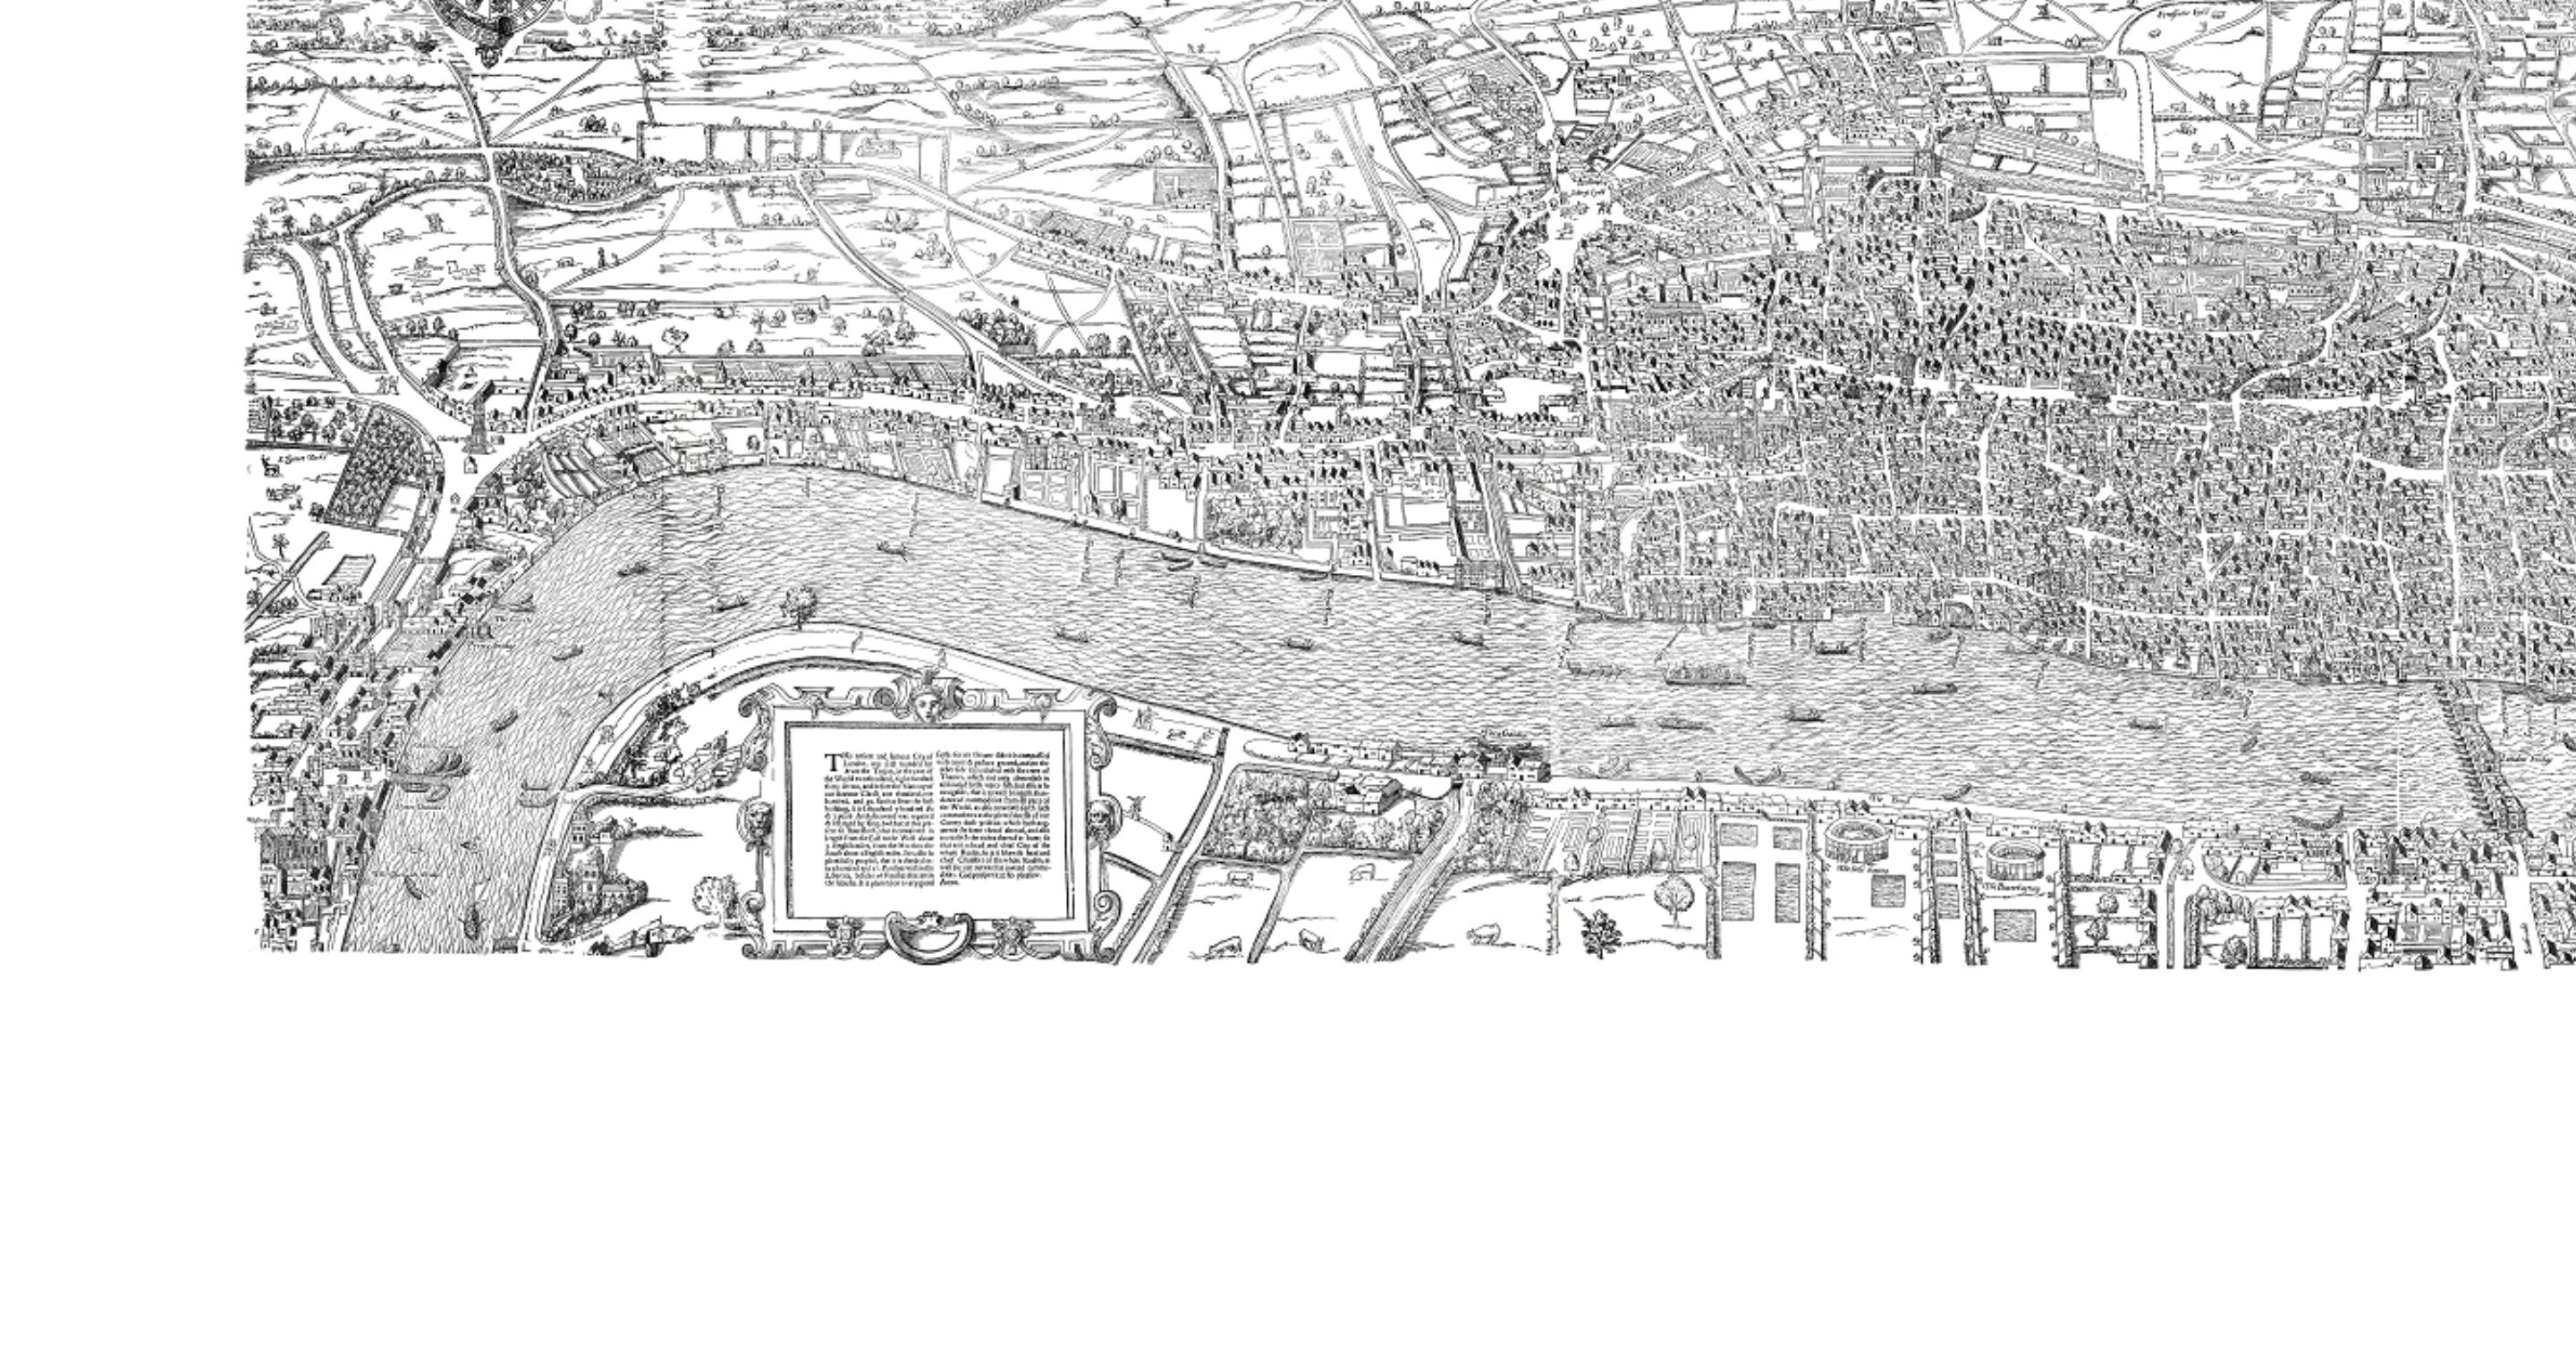

In [188]:
# Agas Map

from IPython.display import Image
Image(filename = "moemlAgas-2.png")

In [189]:
# locations by pixel number

Stpaulschurchyard = [942, 317]
StDunstanchurchyard = [675, 316]
PopeHeadAlley = [1222, 302]
GraceChurchStreet1 = [1317, 259]
GraceChurchStreet2 = [1325, 289]
GraceChurchStreet3 = [1322, 337]
Popesheadtavern = [1212, 312]
Moorgate = [1166, 185]
StBotolphsChurch = [1385, 391]
ChristChurch = [904, 253]
RoyalExchange = [1229, 291]
PaternosterRow1 = [896, 301]
PasternosterRow2 = [922, 390]
PasternosterRow3 = [957, 275]
MiddleTemple = [635, 354]
TempleBar = [640, 323]
TempleChurch = [668, 343]
HolbornBridge = [783, 246]
HolbornConduit = [806, 247]
FosterLane1 = [990, 234]
FosterLane2 = [990, 251]
FosterLane3 = [988, 276]
FleetStreet1 = [647, 322]
FleetStreet2 = [765, 314]
FleetStreet3 = [826, 316]

CheapsideStreet1 = [966, 277]
CheapsideStreet2 = [1039, 288]
CheapsideStreet3 = [1145, 294]

ChanceryLane1 = [634, 229]
ChanceryLane2 = [651, 273]
ChanceryLane3 = [663, 312]

LondonBridge1 = [1328, 446]
LondonBridge2 = [1338, 484]
LondonBridge3 = [1352, 528]

Ludgate = [880, 314]
PaulesWharf = [946, 416]
NewExchange = [332, 206]
YorkHouse = [338, 330]
LambethHill1 = [983, 353]
LambethHill2 = [982, 394]

LongLane1 = [880, 190]
LongLane2 = [921, 167]

## 2. K-Means Clustering

In [190]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import numpy as np

In [191]:
location = [Stpaulschurchyard, 
StDunstanchurchyard,
PopeHeadAlley,
GraceChurchStreet1,
GraceChurchStreet2,
GraceChurchStreet3,
Popesheadtavern,
Moorgate,
StBotolphsChurch,
ChristChurch,
RoyalExchange,
PaternosterRow1,
PasternosterRow2,
PasternosterRow3,
MiddleTemple,
TempleBar,
TempleChurch,
HolbornBridge,
HolbornConduit,
FosterLane1,
FosterLane2,
FosterLane3,
FleetStreet1,
FleetStreet2,
FleetStreet3,
CheapsideStreet1,
CheapsideStreet2,
CheapsideStreet3,
ChanceryLane1, 
ChanceryLane2, 
ChanceryLane3, 
LondonBridge1, 
LondonBridge2,
LondonBridge3, 
Ludgate,
PaulesWharf,
NewExchange, 
YorkHouse,
LambethHill1, 
LambethHill2,
LongLane1, 
LongLane2]


In [192]:
# standardization

scaler = StandardScaler()
scaled_location = scaler.fit_transform(location)

location = np.array(location)

print(location.shape[0])

42


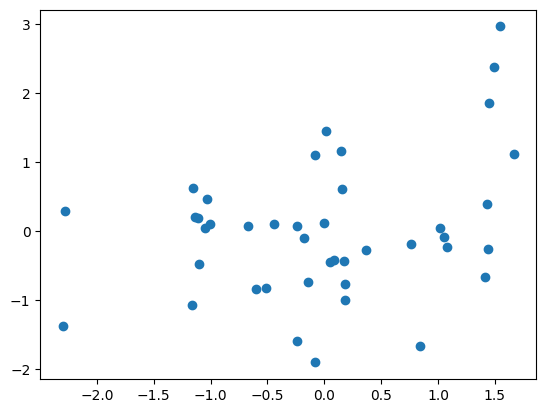

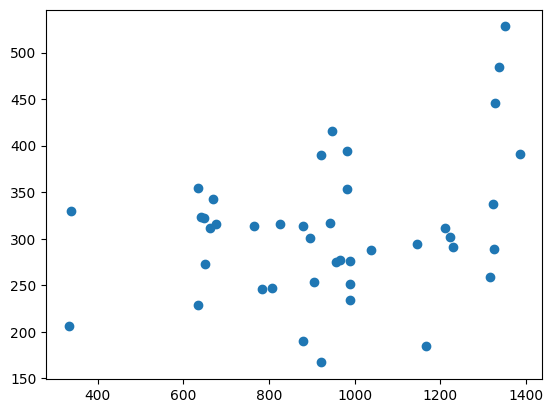

In [193]:
# initial graphing of standardization
plt.style.use('default')


plt.scatter(scaled_location[:, 0], scaled_location[:, 1])
plt.show()

plt.scatter(location[:, 0], location[:, 1])
plt.show()

In [194]:
# Create kmeans object

kmeans = KMeans(
    init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42
)

In [195]:
# fitting

kmeans.fit(scaled_location)

KMeans(init='random', n_clusters=5, random_state=42)

In [196]:
# parameters

print(kmeans.inertia_)
print(kmeans.n_features_in_)
print(kmeans.n_iter_)
print(kmeans.labels_)

17.16531897559383
2
9
[3 0 4 4 4 4 4 1 2 1 4 3 3 1 0 0 0 1 1 1 1 1 0 0 3 1 1 4 0 0 0 2 2 2 3 3 0
 0 3 3 1 1]


[[-1.27395651 -0.08371353]
 [ 0.02466001 -0.90882101]
 [ 1.53712569  2.07503705]
 [-0.07718583  0.5645852 ]
 [ 1.16951219 -0.141447  ]]


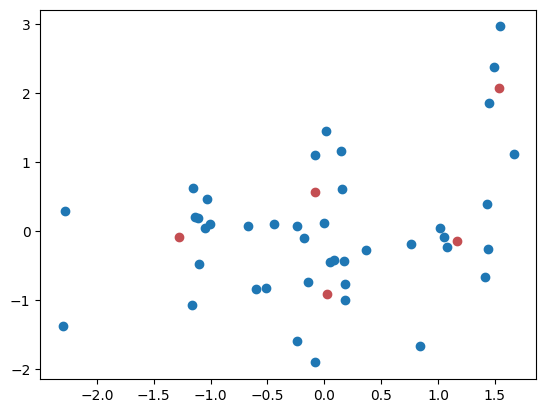

In [197]:
# Final locations of the centroid

print(kmeans.cluster_centers_)

plt.style.use('default')

plt.scatter(scaled_location[:, 0], scaled_location[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "r")
plt.show()

In [198]:
# unscaled the data

original_cluster = scaler.inverse_transform(kmeans.cluster_centers_)

print(original_cluster)

[[ 604.36363636  302.        ]
 [ 949.16666667  240.75      ]
 [1350.75        462.25      ]
 [ 922.125       350.125     ]
 [1253.14285714  297.71428571]]


/Users/andywang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


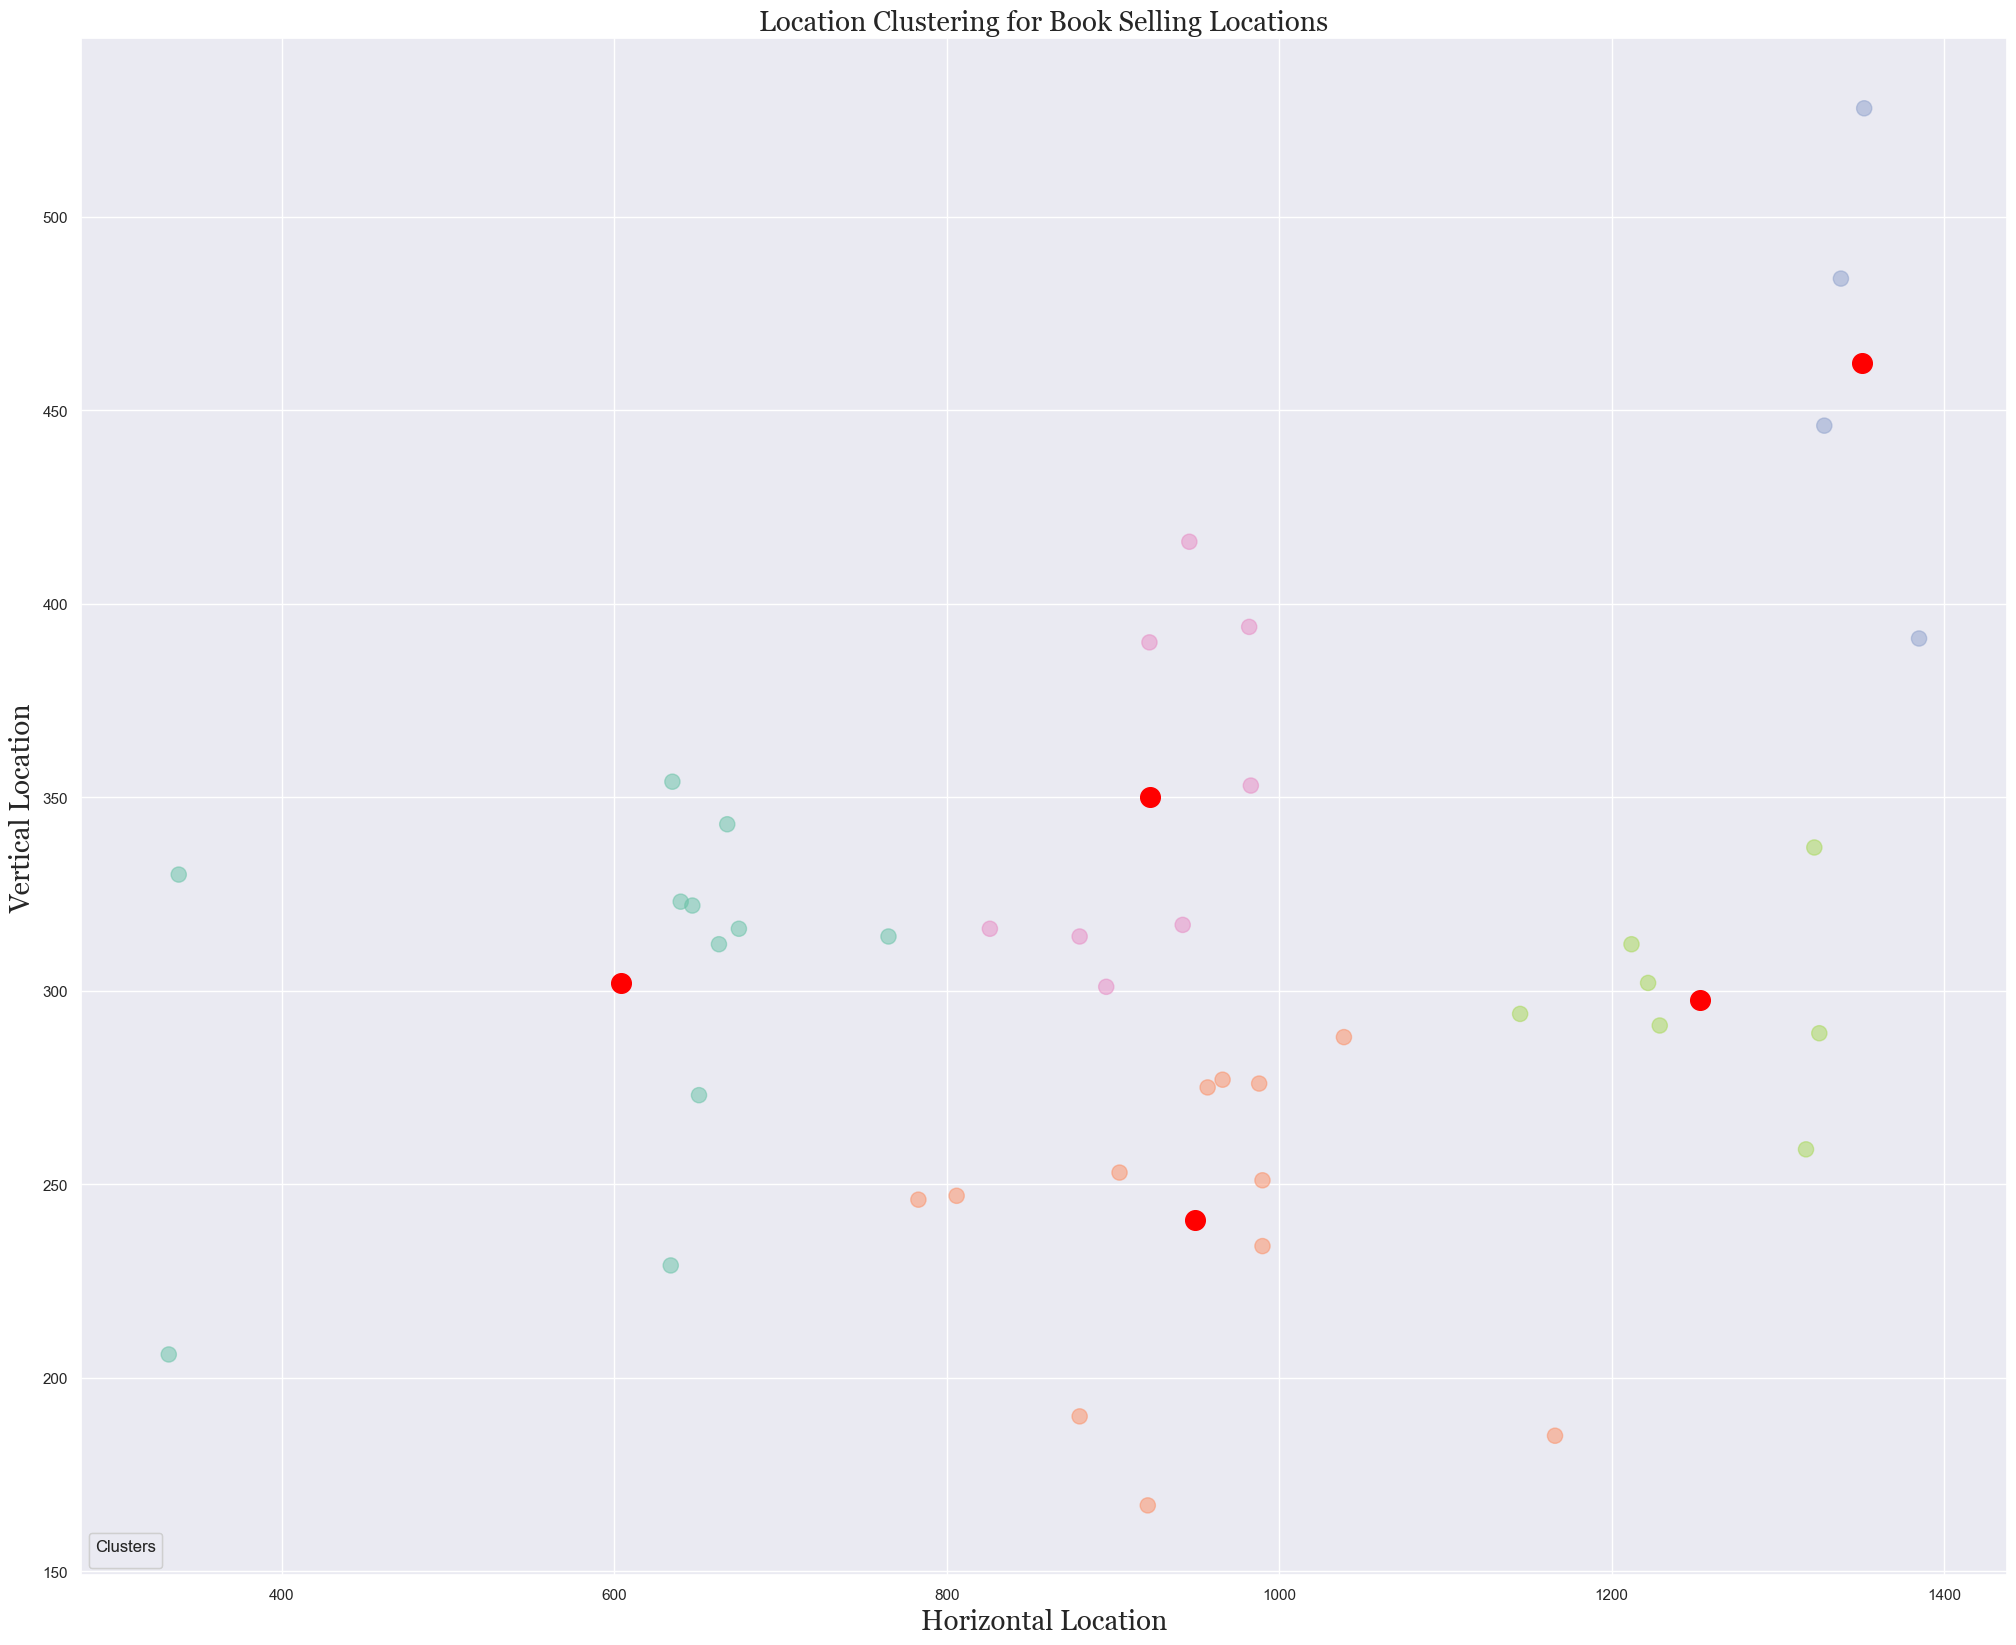

In [199]:
import seaborn as sns

sns.set()


colorset = np.array(sns.color_palette("Set2"))

kmeans.labels_ = np.array(kmeans.labels_)


fig = plt.figure(figsize=(20, 16))
ax = plt.subplot()

sc = ax.scatter(location[:, 0], location[:, 1], c = colorset[kmeans.labels_[:]], alpha = 0.5, s = 120)

ax.scatter(original_cluster[:, 0], original_cluster[:, 1], color = "red", s = 200)

legend1 = ax.legend(*sc.legend_elements(), loc="lower left", title="Clusters")
ax.add_artist(legend1)

ax.grid(True)
fig.tight_layout()

ax.set_xlabel("Horizontal Location", fontsize=20, font = "Georgia")
ax.set_ylabel("Vertical Location", fontsize=20, font = "Georgia")
ax.set_title("Location Clustering for Book Selling Locations", fontsize = 20, font = "Georgia")

plt.show()

## 3. Cluster Naming

Cluster 0 [604, 302, St.Clement Danes]: East Westminster Cluster (Including west St.Dunstans)
    
Cluster 1 [949, 240, St. Martin’s le Grand]: Aldersgate Cluster
    
Cluster 2 [1350, 462]: London Bridge Cluster

Cluster 3 [922, 350, Paul's Chain]: St.Paul's Churchyard Cluster

Cluster 4 [1253, 297, Birchin Lain]: Royal Exchange Cluster

## 4. Visualization

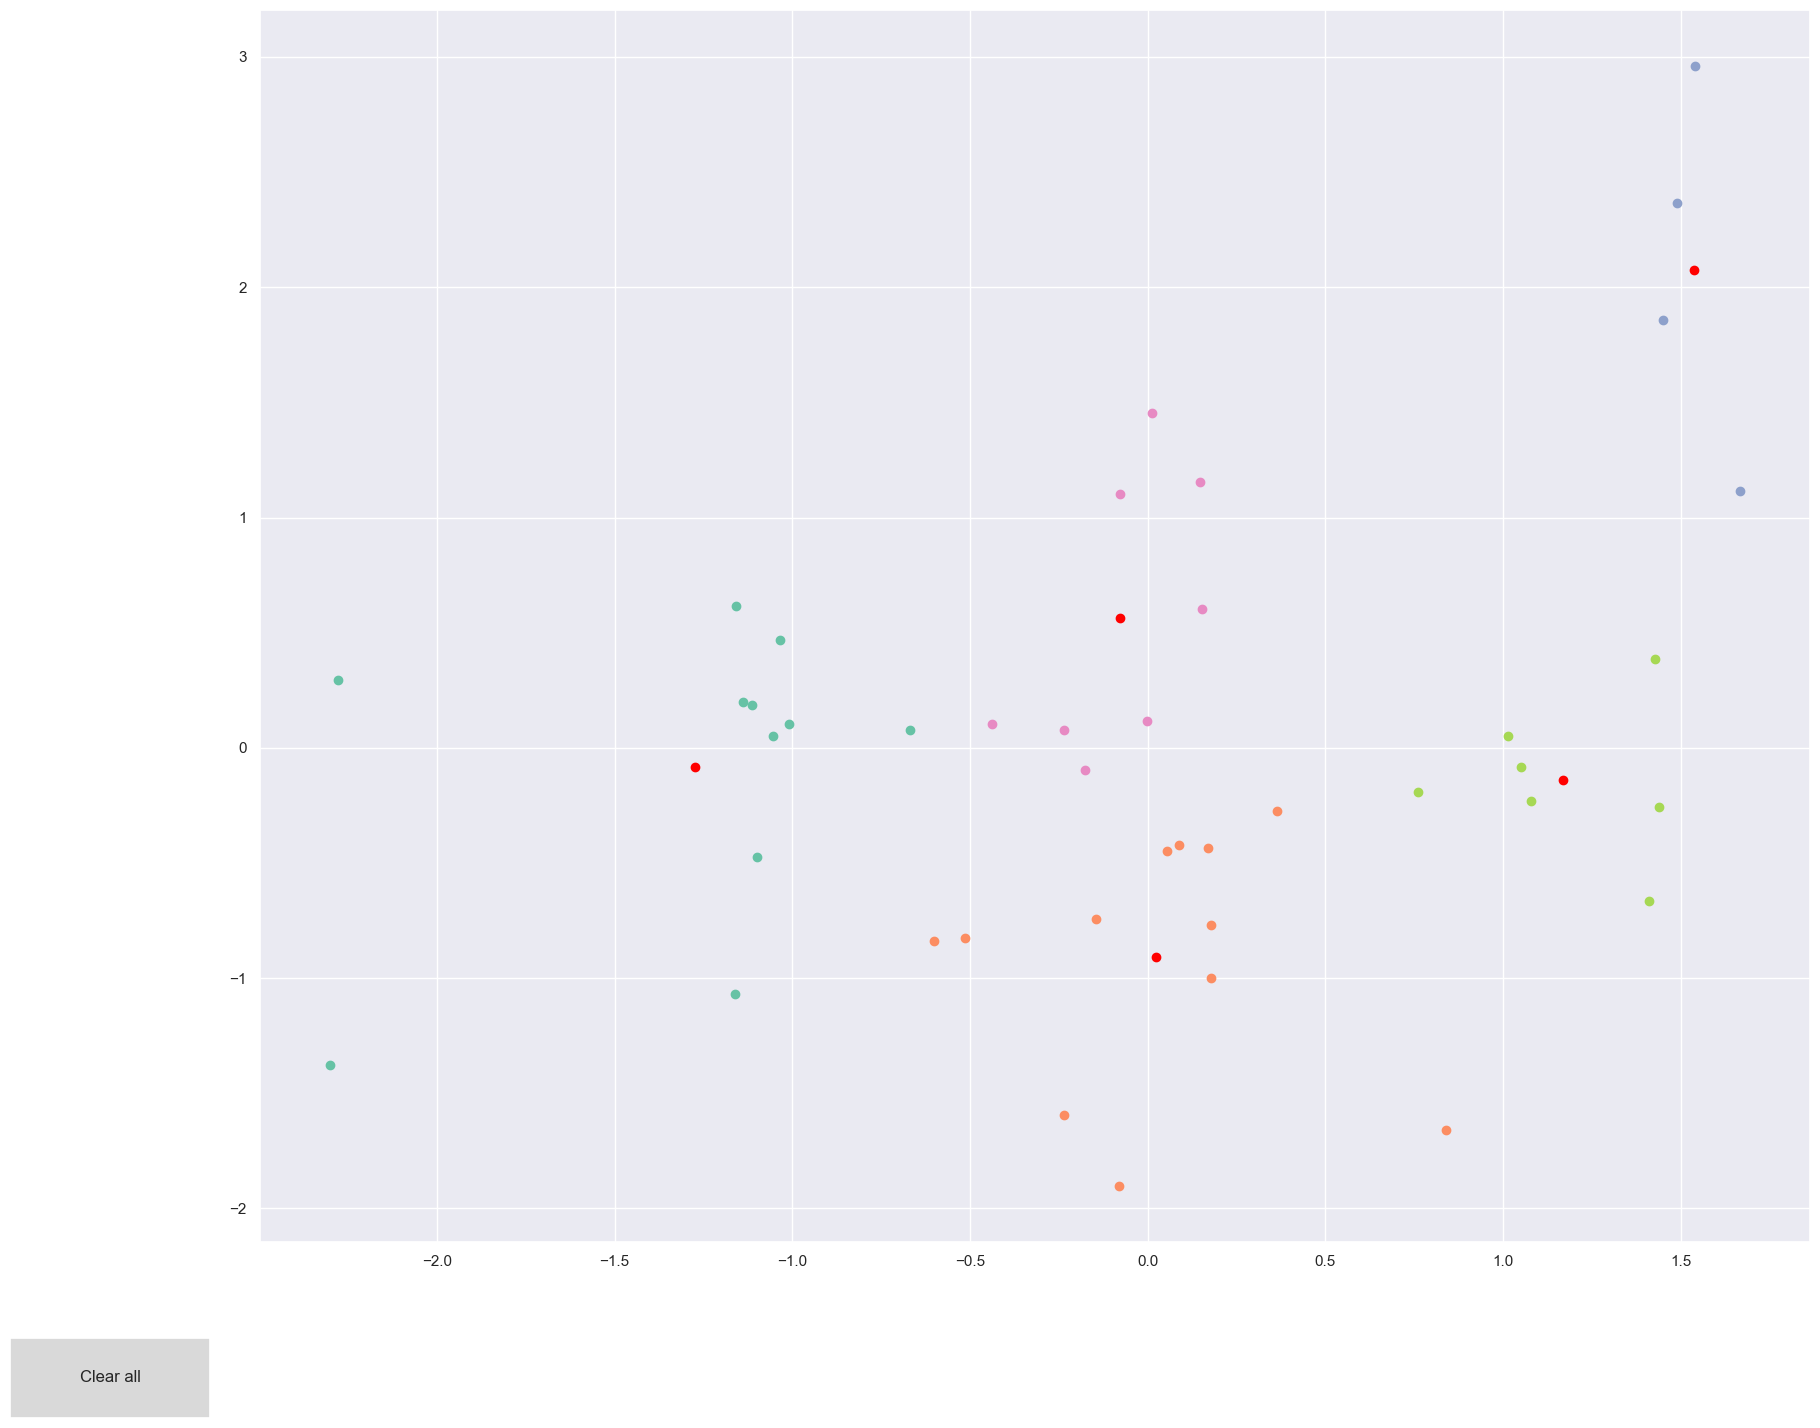

In [200]:
from matplotlib.widgets import Button
from matplotlib.text import Annotation
import seaborn as sns

sns.set()

colorset = sns.color_palette("Set2")

# draw a scatter-plot of the generated values
fig = plt.figure(figsize=(20, 16))
ax = plt.subplot()


# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    for i in range(42):
        ax.scatter(
            scaled_location[i, 0],
            scaled_location[i, 1],
            picker=True,
            color = colorset[kmeans.labels_[i]]
        )
        
    ax.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1], 
        color = "red"
    )

draw_scatterplot()


def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)


def onpick(event):

    offset = 0

    label = location[event]

    print (label)

    annotate(
            ax,
            label,
            label_pos_x + offset,
            label_pos_y + offset
    )

    ax.figure.canvas.draw_idle()
    offset += 0.01


# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')


# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
plt.plot()

# present the scatterplot
plt.show()

## 4. Cluster Number Evaluation

In [201]:
# Generating SSE

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_location)
    sse.append(kmeans.inertia_)

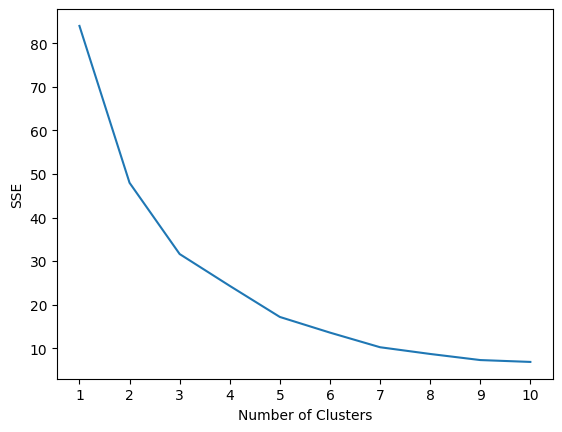

In [202]:
# SSE Graph

plt.style.use("default")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [203]:
# Creating KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [204]:
# Find the elbow

kl.elbow

3

In [205]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_location)
    score = silhouette_score(scaled_location, kmeans.labels_)
    silhouette_coefficients.append(score)

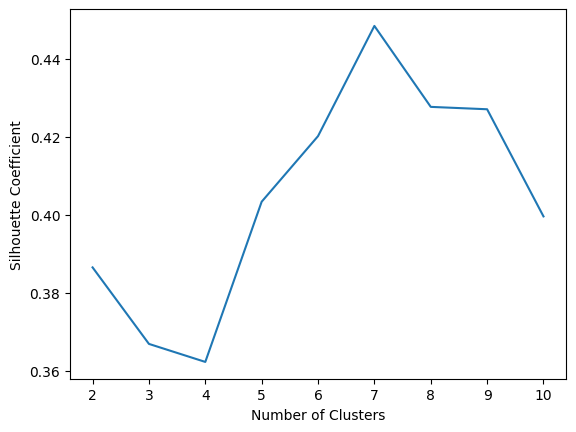

In [206]:
# Plot Silhouette coefficient

plt.style.use("default")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 5. Clustering Evaluation

In [207]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [208]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_location)
dbscan.fit(scaled_location)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_location, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_location, dbscan.labels_).round(2)

In [209]:
kmeans_silhouette

0.39

In [210]:
dbscan_silhouette

0.05

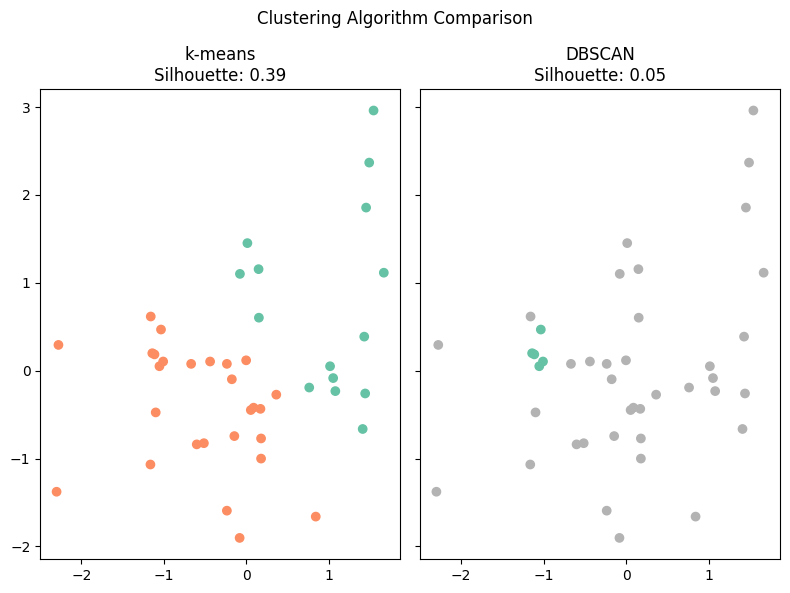

In [211]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison", fontsize=12)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [colorset[label] for label in kmeans.labels_]
ax1.scatter(scaled_location[:, 0], scaled_location[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [colorset[label] for label in dbscan.labels_]
ax2.scatter(scaled_location[:, 0], scaled_location[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
fig.tight_layout()
 
plt.show()